In [1]:
import git
from datetime import date
from datetime import timedelta

import os
from bbid import bbid

from pathlib import Path

import string
import random

import tensorflow as tf
import numpy as np
import json
import zipfile
import shutil

import kfp

import urllib

from kale.common import rokutils
from cat_cnn_component.cat_preprocessing import set_label

import requests
import pickle
import filecmp

from PIL import Image
from skimage import io
import gc

from tensorflow.keras.layers import Conv2D, Dense, Flatten, InputLayer, Reshape

from functools import partial
import time

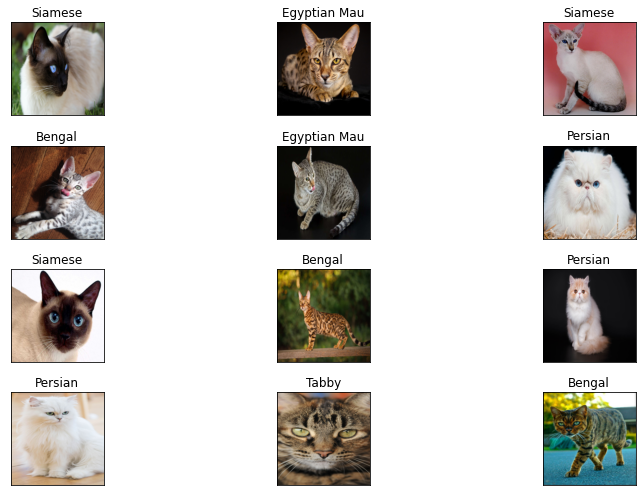

In [23]:
labels = set_label()

for label in labels:
    for 

f,a = plt.subplots(nrows=4, ncols=3,figsize=(13, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(a.flat):
    ax.imshow(dataset[i])
    ax.set_title(label_names[y_dataset[i]])
    
plt.tight_layout()
plt.show()

In [9]:
plt.imshow(dataset[2])

IndexError: index 2 is out of bounds for axis 0 with size 0

In [10]:
dataset

array([], dtype=float64)

In [22]:
label_names[y_dataset[1]]

'Egyptian Mau'

In [28]:
labels = set_label()
counts = []
for label in labels:
    path = "/home/jovyan/cat-breed-vol-1/dataset/dataset/images/" + label + "/"
    counts.append(len(os.listdir(path)))
counts

[2377, 509, 3764, 2545, 2867]

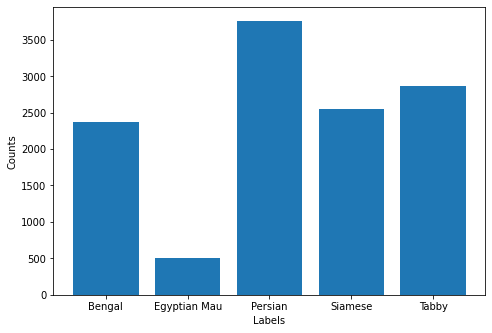

In [30]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(labels, counts)
ax.set_ylabel('Counts')
ax.set_xlabel('Labels')
plt.show()

In [2]:
repo = git.Repo('.')
o = repo.remotes.origin
o.pull()
print("Pulled Code from main branch.")

last_week = date.today() - timedelta(7)

Pulled Code from main branch.


In [3]:
commits = list(repo.iter_commits(since=last_week))

In [4]:
commits

[<git.Commit "12ff7b4f14b0cb434abd7e2b367862acd08d632e">]

In [10]:
for commit in commits:
    print("Committed by %s on %s with sha %s" % (commit.committer.name, time.strftime("%a, %d %b %Y %H:%M", time.localtime(commit.committed_date)), commit.hexsha))
    print("Commit message: " + str(commit.message))
    print("-----------------------------------------")


Committed by galaxyhotdog on Tue, 12 Apr 2022 09:05 with sha 12ff7b4f14b0cb434abd7e2b367862acd08d632e
Commit message: ok

-----------------------------------------


In [2]:
url = "http://10.0.2.2:8000/prediction/pipeline_dataset"
with open('/home/jovyan/cat-breed-vol-1/new_dataset-test.zip', 'wb') as out_file:
    content = requests.get(url, stream=True).content
    out_file.write(content)

In [3]:
import os
os.remove('/home/jovyan/cat-breed-vol-1/dataset.zip')

In [7]:
print('Uploading new dataset to frontend.')
data = {
'labels': set_label(),
}
with open('/home/jovyan/cat-breed-vol-1/labels_pickled', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)
value = {"name": 'dog'}
files = {'tfrecord': open('/home/jovyan/cat-breed-vol-1/images-cat.tfrecords','rb'), 'labels_pickled':open('/home/jovyan/cat-breed-vol-1/labels_pickled', 'rb')}
r = requests.post('http://10.0.2.2:8000/prediction/download_tfrecord', files=files, data=value)
print("TFRecord and new labels uploaded to frontend")

Uploading new dataset to frontend.
TFRecord and new labels uploaded to frontend


In [5]:


if os.path.exists("/home/jovyan/cat-breed-vol-1/labels_pickled"):
    os.remove("/home/jovyan/cat-breed-vol-1/labels_pickled")
print('Uploading new dataset to frontend.')
data = {
'labels': set_label(),
}
with open('/home/jovyan/cat-breed-vol-1/labels_pickled', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)
value = {"name": "test"}
files = {'tfrecord': open('/home/jovyan/cat-breed-vol-1/images-cat.tfrecords','rb'), 'labels_pickled':open('/home/jovyan/cat-breed-vol-1/labels_pickled', 'rb')}
r = requests.post('http://10.0.2.2:8000/prediction/download_tfrecord', files=files, data=value)
print("TFRecord and new labels uploaded to frontend")

Uploading new dataset to frontend.
TFRecord and new labels uploaded to frontend


In [9]:
def random_string(size=10, chars=string.ascii_lowercase + string.digits):
    return ''.join(random.choice(chars) for _ in range(size))

def listToString(s):
    str1 = " " 
    return (str1.join(s))

if True:
    try:
        if os.path.exists("/home/jovyan/cat-breed-vol-1/labels_pickled"):
            os.remove("/home/jovyan/cat-breed-vol-1/labels_pickled")
        print('Uploading new dataset to frontend.')
        data = {
        'labels': set_label(),
        }
        with open('/home/jovyan/cat-breed-vol-1/labels_pickled', 'wb') as f:
            # Pickle the 'data' dictionary using the highest protocol available.
            pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)
        value = {"name": "test"}
        files = {'tfrecord': open('/home/jovyan/cat-breed-vol-1/images-cat.tfrecords','rb'), 'labels_pickled':open('/home/jovyan/cat-breed-vol-1/labels_pickled', 'rb')}
        r = requests.post('http://10.0.2.2:8000/prediction/download_tfrecord', files=files, data=value)
        print("TFRecord and new labels uploaded to frontend")
    except:
        print('Unable connect to server, No file uploaded.')
        pass

Uploading new dataset to frontend.
TFRecord and new labels uploaded to frontend


In [8]:
import os
import kfp
import string
import random

def random_string(size=10, chars=string.ascii_lowercase + string.digits):
    return ''.join(random.choice(chars) for _ in range(size))

val = random_string()
str(val)

'emlv7drxw2'